# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import pearsonr,spearmanr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')


# Read Data

In [ ]:
data=pd.read_csv('stircom.csv')

In [ ]:
data.head()

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


# EDA

In [ ]:
camapign = data.new_contract_this_campaign.value_counts().to_frame().rename(columns={"new_contract_this_campaign":"absolute"})
camapign["percent"] = (camapign.apply(lambda x: x/x.sum()*100).round(2))
display(camapign)

,absolute,percent
no,40763,80.46
yes,9899,19.54


In [ ]:
data.shape

(50662, 20)

In [ ]:
data.isnull().sum()

ID                                           0
town                                         0
country                                      0
age                                          0
job                                          0
married                                      0
education                                    0
arrears                                      0
current_balance                              0
housing                                      0
has_tv_package                               0
last_contact                                 0
conn_tr                                      0
last_contact_this_campaign_day               0
last_contact_this_campaign_month             0
this_campaign                                0
days_since_last_contact_previous_campaign    0
contacted_during_previous_campaign           0
outcome_previous_campaign                    0
new_contract_this_campaign                   0
dtype: int64

In [ ]:
data.columns

Index(['ID', 'town', 'country', 'age', 'job', 'married', 'education',
       'arrears', 'current_balance', 'housing', 'has_tv_package',
       'last_contact', 'conn_tr', 'last_contact_this_campaign_day',
       'last_contact_this_campaign_month', 'this_campaign',
       'days_since_last_contact_previous_campaign',
       'contacted_during_previous_campaign', 'outcome_previous_campaign',
       'new_contract_this_campaign'],
      dtype='object')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50662 entries, 0 to 50661
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         50662 non-null  int64  
 1   town                                       50662 non-null  object 
 2   country                                    50662 non-null  object 
 3   age                                        50662 non-null  int64  
 4   job                                        50662 non-null  object 
 5   married                                    50662 non-null  object 
 6   education                                  50662 non-null  object 
 7   arrears                                    50662 non-null  object 
 8   current_balance                            50662 non-null  float64
 9   housing                                    50662 non-null  object 
 10  has_tv_package        

In [ ]:
data.describe()

,ID,age,current_balance,conn_tr,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign
count,5.066200e+04,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000
mean,5.502871e+07,40.979373,13.991210,3.005093,15.768525,2.713217,42.644408,0.640283
std,2.598596e+07,10.919324,30.899163,1.409003,8.347083,3.052227,102.238078,2.358029
min,1.000073e+07,18.000000,-80.190000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,3.249964e+07,32.000000,0.820000,2.000000,8.000000,1.000000,-1.000000,0.000000
50%,5.501127e+07,39.000000,4.720000,3.000000,16.000000,2.000000,-1.000000,0.000000
75%,7.748809e+07,48.000000,14.950000,4.000000,21.000000,3.000000,-1.000000,0.000000
max,9.999952e+07,95.000000,984.170000,5.000000,31.000000,63.000000,871.000000,275.000000


In [ ]:
data.corr()

,ID,age,current_balance,conn_tr,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign
ID,1.000000,-0.001237,-0.004142,0.008362,0.000980,-0.005354,-0.002558,-0.000492
age,-0.001237,1.000000,0.101688,-0.005501,-0.007633,0.001733,-0.017208,0.005704
current_balance,-0.004142,0.101688,1.000000,-0.001223,0.007047,-0.014508,0.007244,0.019504
conn_tr,0.008362,-0.005501,-0.001223,1.000000,0.004237,0.003277,-0.005558,-0.000411
last_contact_this_campaign_day,0.000980,-0.007633,0.007047,0.004237,1.000000,0.156636,-0.089422,-0.053263
this_campaign,-0.005354,0.001733,-0.014508,0.003277,0.156636,1.000000,-0.093053,-0.037818
days_since_last_contact_previous_campaign,-0.002558,-0.017208,0.007244,-0.005558,-0.089422,-0.093053,1.000000,0.460869
contacted_during_previous_campaign,-0.000492,0.005704,0.019504,-0.000411,-0.053263,-0.037818,0.460869,1.000000


# Univariate Analysis


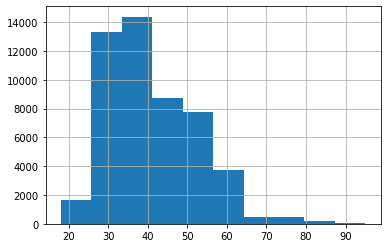

In [ ]:
#Age Distribution

data['age'].hist();

## Analysis of Categorical and Target Variable

### Age and Target Variable

In [ ]:
data['age'].unique()

array([39, 53, 79, 43, 35, 24, 49, 54, 29, 56, 47, 33, 41, 44, 32, 42, 66,
       37, 34, 55, 50, 48, 36, 40, 38, 27, 58, 18, 30, 59, 28, 31, 26, 51,
       46, 57, 75, 65, 73, 78, 25, 69, 45, 76, 60, 22, 52, 62, 72, 61, 63,
       23, 70, 68, 20, 67, 71, 83, 64, 77, 81, 80, 21, 19, 85, 86, 84, 74,
       87, 90, 88, 89, 82, 93, 92, 95])

In [ ]:
print(data['age'].max())
print(data['age'].min())

95
18


In [ ]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [ ]:
count_age_response_pct = pd.crosstab(data['new_contract_this_campaign'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 
count_age_response_pct

new_contract_this_campaign,no,yes
age_group,,
20.0,71.983871,28.016129
30.0,82.151723,17.848277
40.0,84.554564,15.445436
50.0,83.961342,16.038658
60.0,52.203680,47.796320


In [ ]:
age = pd.DataFrame(data['age_group'].value_counts())
age['% new_contract'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

age

,% new_contract,age
20.0,28.016129,20
30.0,17.848277,30
40.0,15.445436,40
50.0,16.038658,50
60.0,47.796320,60


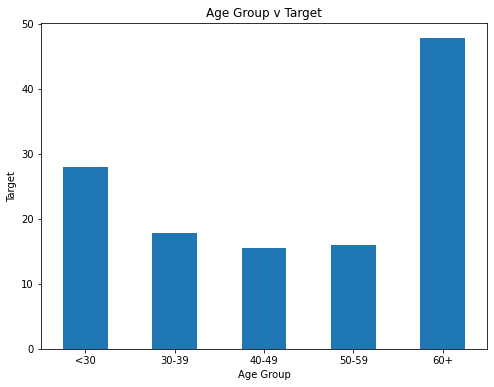

In [ ]:
plot_age = age['% new_contract'].plot(kind = 'bar',
                                              figsize=(8,6))
plt.xlabel('Age Group')
plt.ylabel('Target')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Age Group v Target')
plt.show()

In [ ]:
data.head()

,ID,town,country,age,job,married,education,arrears,current_balance,housing,...,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign,age_group
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,...,unknown,4,11,jun,8,-1,0,unknown,yes,30.0
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,...,cellular,1,28,jul,2,-1,0,unknown,yes,50.0
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,...,telephone,3,13,jul,1,377,1,success,yes,60.0
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,...,cellular,3,13,may,2,-1,0,unknown,no,40.0
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,...,cellular,2,27,aug,16,-1,0,unknown,yes,30.0


### Town and Target

In [ ]:
data['town'].nunique()

101

In [ ]:
count_town_response_pct = pd.crosstab(data['new_contract_this_campaign'],data['town']).apply(lambda x: x/x.sum() * 100)
count_town_response_pct = count_town_response_pct.transpose() 
count_town_response_pct

new_contract_this_campaign,no,yes
town,,
Aberdeen,81.462141,18.537859
Barnsley,80.750000,19.250000
Basildon,76.470588,23.529412
Basingstoke,80.555556,19.444444
Bath,82.051282,17.948718
...,...,...
Woking,82.878412,17.121588
Wolverhampton,82.025316,17.974684
Worcester,79.361179,20.638821


In [ ]:
data.shape

(50662, 21)

In [ ]:
town = pd.DataFrame(data['town'].value_counts())
town['% new_contract'] = count_town_response_pct['yes']
town.drop('town',axis = 1,inplace = True)

town = town.sort_values('% new_contract',ascending = False)
town

,% new_contract
St Albans,23.958333
Preston,23.844282
Solihull,23.584906
Basildon,23.529412
Cheltenham,23.393316
...,...
Newcastle upon Tyne,16.052632
Southend-on-Sea,15.733333
Kingston upon Hull,15.402844
Wakefield,14.843750


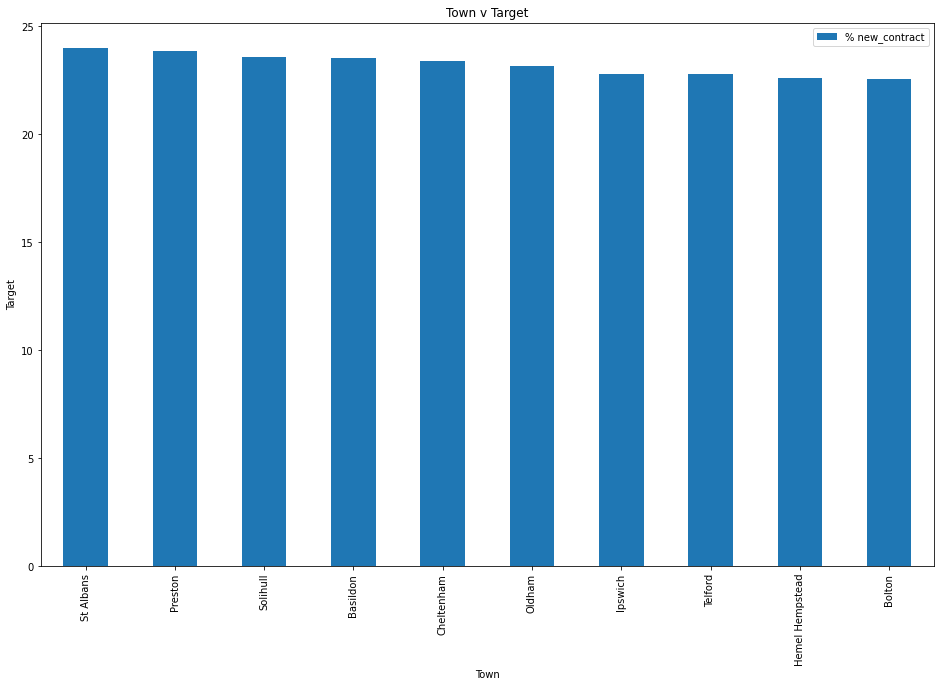

In [ ]:
plot_age = town[:10].plot(kind = 'bar',figsize=(16,10))
plt.xlabel('Town')
plt.ylabel('Target')
plt.title('Town v Target')
plt.show()

In [ ]:
data['country'].value_counts()

UK          50657
France          2
Germany         1
USA             1
Portugal        1
Name: country, dtype: int64

### Job v Target

In [ ]:
count_job_response_pct = pd.crosstab(data['new_contract_this_campaign'],data['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

Text(0, 0.5, 'Job Category')

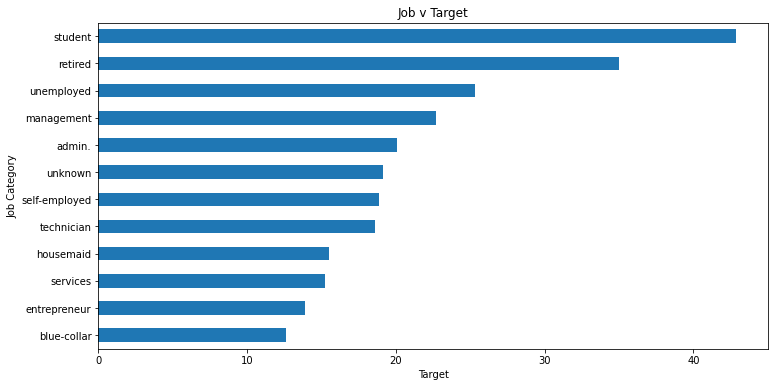

In [ ]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Job v Target')
plt.xlabel('Target')
plt.ylabel('Job Category')

### Marital Status v Target

In [ ]:
count_married_response_pct = pd.crosstab(data['new_contract_this_campaign'],data['married']).apply(lambda x: x/x.sum() * 100)
count_married_response_pct = count_married_response_pct.transpose()

Text(0, 0.5, 'Marital Category')

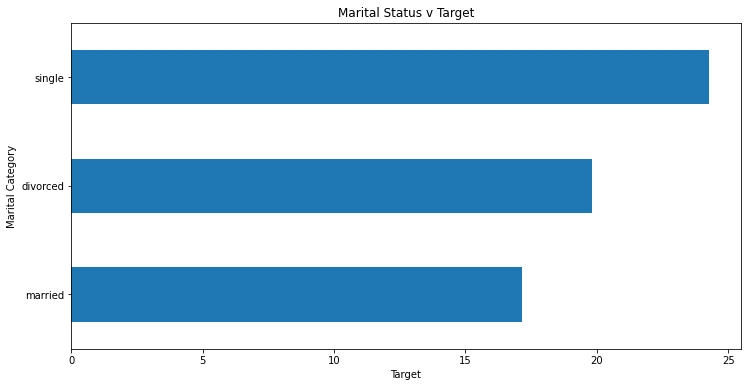

In [ ]:
plot_marriage = plot_job = count_married_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Marital Status v Target')
plt.xlabel('Target')
plt.ylabel('Marital Category')

### Education v Target

In [ ]:
data.education.unique()

array(['tertiary', 'primary', 'secondary', 'unknown'], dtype=object)

In [ ]:
count_education_response_pct = pd.crosstab(data['new_contract_this_campaign'],data['education']).apply(lambda x: x/x.sum() * 100)
count_education_response_pct = count_education_response_pct.transpose()

Text(0, 0.5, 'Education')

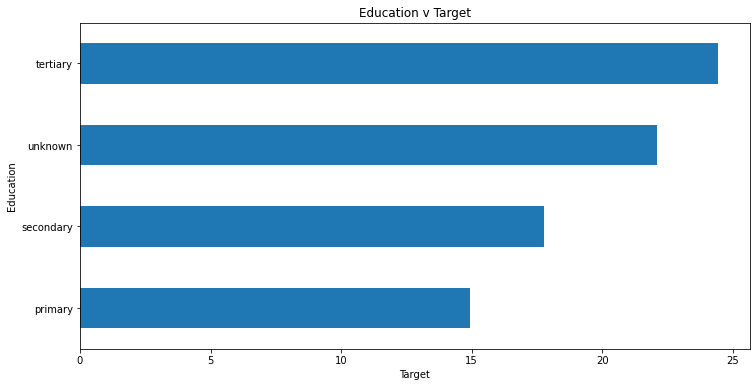

In [ ]:
plot_education = plot_job = count_education_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Education v Target')
plt.xlabel('Target')
plt.ylabel('Education')

# Feature Engineering

### Change Months to Numneric

In [ ]:
data.last_contact_this_campaign_month.unique()

array(['jun', 'jul', 'may', 'aug', 'sep', 'feb', 'nov', 'mar', 'jan',
       'apr', 'dec', 'oct', 'j'], dtype=object)

In [ ]:
#locate column that has month as 'j'
data.loc[data['last_contact_this_campaign_month']=='j']

,ID,town,country,age,job,married,education,arrears,current_balance,housing,...,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign,age_group
3513,56786748,Wigan,UK,32,technician,married,secondary,no,5.6,no,...,cellular,4,6,j,4,-1,0,unknown,yes,30.0


In [ ]:
#drop column that has month as 'j'
data = data.drop(data.index[3513])

In [ ]:
data.last_contact_this_campaign_month.unique()

array(['jun', 'jul', 'may', 'aug', 'sep', 'feb', 'nov', 'mar', 'jan',
       'apr', 'dec', 'oct'], dtype=object)

In [ ]:
#convert months to the numeric equivalent
month = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}

data.last_contact_this_campaign_month = data.last_contact_this_campaign_month.apply(lambda x: month[x])
data.head()

,ID,town,country,age,job,married,education,arrears,current_balance,housing,...,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign,age_group
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,...,unknown,4,11,6,8,-1,0,unknown,yes,30.0
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,...,cellular,1,28,7,2,-1,0,unknown,yes,50.0
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,...,telephone,3,13,7,1,377,1,success,yes,60.0
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,...,cellular,3,13,5,2,-1,0,unknown,no,40.0
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,...,cellular,2,27,8,16,-1,0,unknown,yes,30.0


## Label Encoding for binary columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
data.columns

Index(['ID', 'town', 'country', 'age', 'job', 'married', 'education',
       'arrears', 'current_balance', 'housing', 'has_tv_package',
       'last_contact', 'conn_tr', 'last_contact_this_campaign_day',
       'last_contact_this_campaign_month', 'this_campaign',
       'days_since_last_contact_previous_campaign',
       'contacted_during_previous_campaign', 'outcome_previous_campaign',
       'new_contract_this_campaign', 'age_group'],
      dtype='object')

In [ ]:
data['new_contract_this_campaign'] = encoder.fit_transform(data['new_contract_this_campaign'])
data['arrears'] = encoder.fit_transform(data['arrears'])
data['housing'] = encoder.fit_transform(data['housing'])
data['has_tv_package'] = encoder.fit_transform(data['has_tv_package'])

## Convert categorical variables into dummy variables

In [ ]:
data = pd.get_dummies(data, columns=['job','married','education','last_contact','outcome_previous_campaign'])

In [ ]:
data.head()

,ID,town,country,age,arrears,current_balance,housing,has_tv_package,conn_tr,last_contact_this_campaign_day,...,education_tertiary,education_unknown,last_contact_cell,last_contact_cellular,last_contact_telephone,last_contact_unknown,outcome_previous_campaign_failure,outcome_previous_campaign_other,outcome_previous_campaign_success,outcome_previous_campaign_unknown
0,32390233,Bristol,UK,39,0,-1.90,0,2,4,11,...,1,0,0,0,0,1,0,0,0,1
1,41226029,Basildon,UK,53,0,3.62,0,1,1,28,...,0,0,0,1,0,0,0,0,0,1
2,85498057,Blackburn,UK,79,0,27.87,0,1,3,13,...,0,0,0,0,1,0,0,0,1,0
3,76539627,Oldham,UK,43,0,5.50,1,1,3,13,...,0,0,0,1,0,0,0,0,0,1
4,76290986,Middlesbrough,UK,35,0,3.44,0,1,2,27,...,0,0,0,1,0,0,0,0,0,1


# Feature selection using Pearson Correlation P-value

In [ ]:
#drop ID column
data.drop(columns=['ID','town','country'], axis=1, inplace=True)

In [ ]:
#create a copy of data frame
data_nu = data.copy()
Xnum = data.drop(["new_contract_this_campaign"], axis= "columns")
ynum = data.new_contract_this_campaign


In [ ]:
#feature selection using pearson correlation p-value
pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col], 
    ynum) for col in Xnum.columns], 
    columns=["Pearson Corr.", "p-value"], 
    index=Xnum.columns,
).round(4)

,Pearson Corr.,p-value
age,0.0305,0.0000
arrears,-0.0298,0.0000
current_balance,0.0640,0.0000
housing,-0.1721,0.0000
has_tv_package,-0.0852,0.0000
conn_tr,-0.0024,0.5875
last_contact_this_campaign_day,-0.0386,0.0000
last_contact_this_campaign_month,0.0221,0.0000
this_campaign,-0.0918,0.0000
days_since_last_contact_previous_campaign,0.1267,0.0000


In [ ]:
#drop columns with p-value > 0.05 because they are not significant and have low information to the target variable

data.drop(columns=['conn_tr','age_group','job_admin.','job_self-employed','job_unknown','married_divorced'], axis=1, inplace=True)

# Modeling

In [ ]:
X = data.drop(columns = ['new_contract_this_campaign'])
y = data.new_contract_this_campaign

## Split Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 42)

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier()))

## Cross Validation

In [ ]:
results_c = []
names_c = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)    
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.741697 (0.010335)
KNN: 0.791267 (0.006099)
CART: 0.848951 (0.011512)
NB: 0.718920 (0.010137)
SVC: 0.669601 (0.017759)
RF: 0.933539 (0.006295)


## Best Model - Random Forest

### Train on the Dataset

In [ ]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predictions = RF.predict(X_test)

# Model Evaluation

In [ ]:
# ROC Score 
print(roc_auc_score(y_test, predictions))

0.8931746943245779


In [ ]:
print(confusion_matrix(y_test, predictions))

[[7942  211]
 [ 371 1609]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      8153
           1       0.88      0.81      0.85      1980

    accuracy                           0.94     10133
   macro avg       0.92      0.89      0.91     10133
weighted avg       0.94      0.94      0.94     10133



This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.

By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers.

The main objective of this project is to identify the most responsive customers before the marketing campaign so that the bank will be able to efficiently reach out to them, saving time and marketing resources. To achieve this objective, classification algorithms will be employed. By analyzing customer statistics, a classification model will be built to classify all clients into two groups: "yes" to term deposits and "no" to term deposits.

The main objective of this project is to increase the effectiveness of the bank's telemarketing campaign, which was successfully met through data analysis, visualization and analytical model building. A target customer profile was established while classification and regression models were built to predict customers' response to the term deposit campaign.

Conclusion:
According to previous analysis, a target customer profile can be established. The most responsive customers possess these features:

Feature 1: age < 30 or age > 60
Feature 2: students or retired people
Feature 3: a balance of more than 5000 euros
By applying logistic and ridge regression algorithms, classification and estimation model were successfully built. With these two models, the bank will be able to predict a customer's response to its telemarketing campaign before calling this customer. In this way, the bank can allocate more marketing efforts to the clients who are classified as highly likely to accept term deposits, and call less to those who are unlikely to make term deposits.

In addition, predicting duration before calling and adjusting marketing plan benefit both the bank and its clients. On the one hand, it will increase the efficiency of the bank’s telemarketing campaign, saving time and efforts. On the other hand, it prevents some clients from receiving undesirable advertisements, raising customer satisfaction. With the aid of logistic and ridge regression models, the bank can enter a virtuous cycle of effective marketing, more investments and happier customers.
